In [1]:
import sys
sys.path.append("..\\Assignment1")

import Assignment1

import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot # imported as plt
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.api as sns
import seaborn # Assignment1 imported as sns


In [2]:
data = Assignment1.Data("hmelq.csv")
data_pd = pd.read_csv("hmelq.csv") 

About Data

    BAD: '1' refers to an applicant who defaulted the loan(seriously delinquent) and '0' refers to an applicant who paid the loan(non delinquent).
    LOAN: Amount of the loan request
    MORTDUE: Amount due on existing mortgage
    VALUE: Value of current property
    REASON: DebtCon = debt consolidationn; HomeImp = home improvement
    JOB: Occupational categories(job categories)
    YOJ: Years at present job
    DEROG: Number of major derogatory reports
    DELINQ: Number of delinquent credit lines
    CLAGE: Age of oldest credit line in months
    NINQ: Number of recent credit inquiries
    CLNO: Number of credit lines
    DEBTINC: Debt-to-income ratio
    Here, the variable 'BAD' will be an outcome variable with binary values and remaining all variables will be predictors.

In [3]:
data.getHead()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
data.getShape()

(3576, 13)

In [5]:
data.getInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [6]:
data.getDescribe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [7]:
data_pd.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

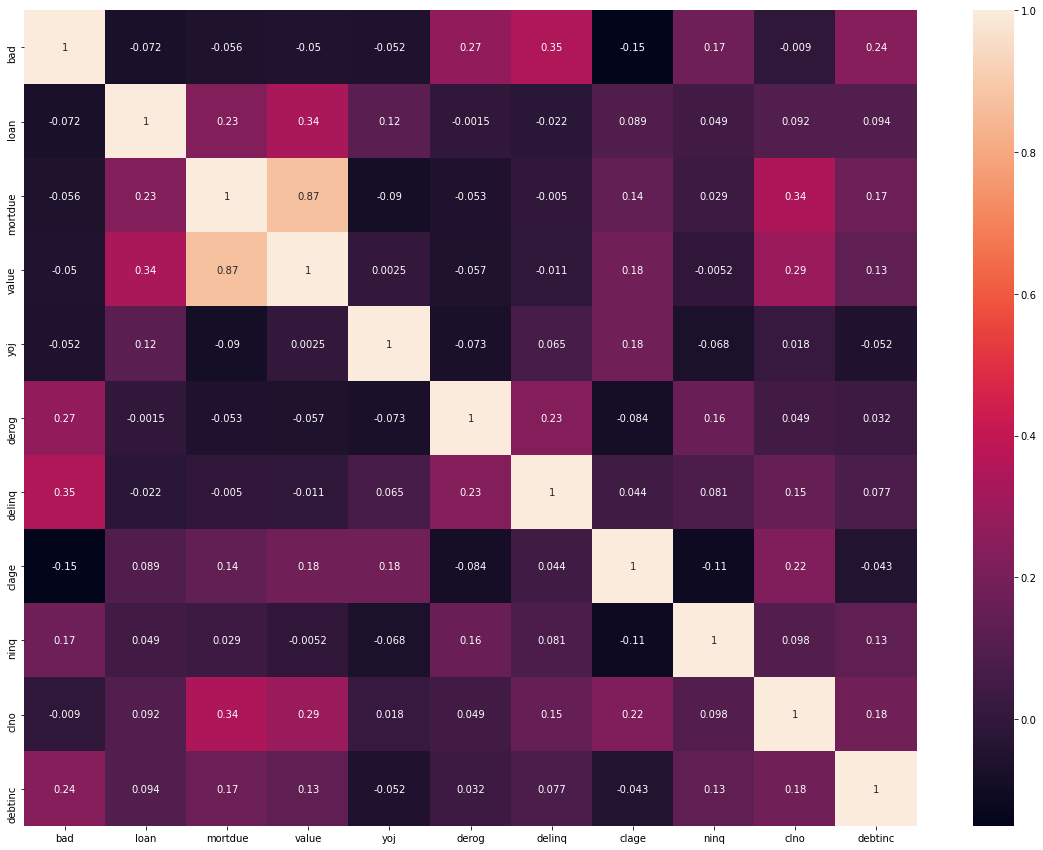

In [8]:
data.showCorrelationMap()

<Figure size 1440x1080 with 0 Axes>

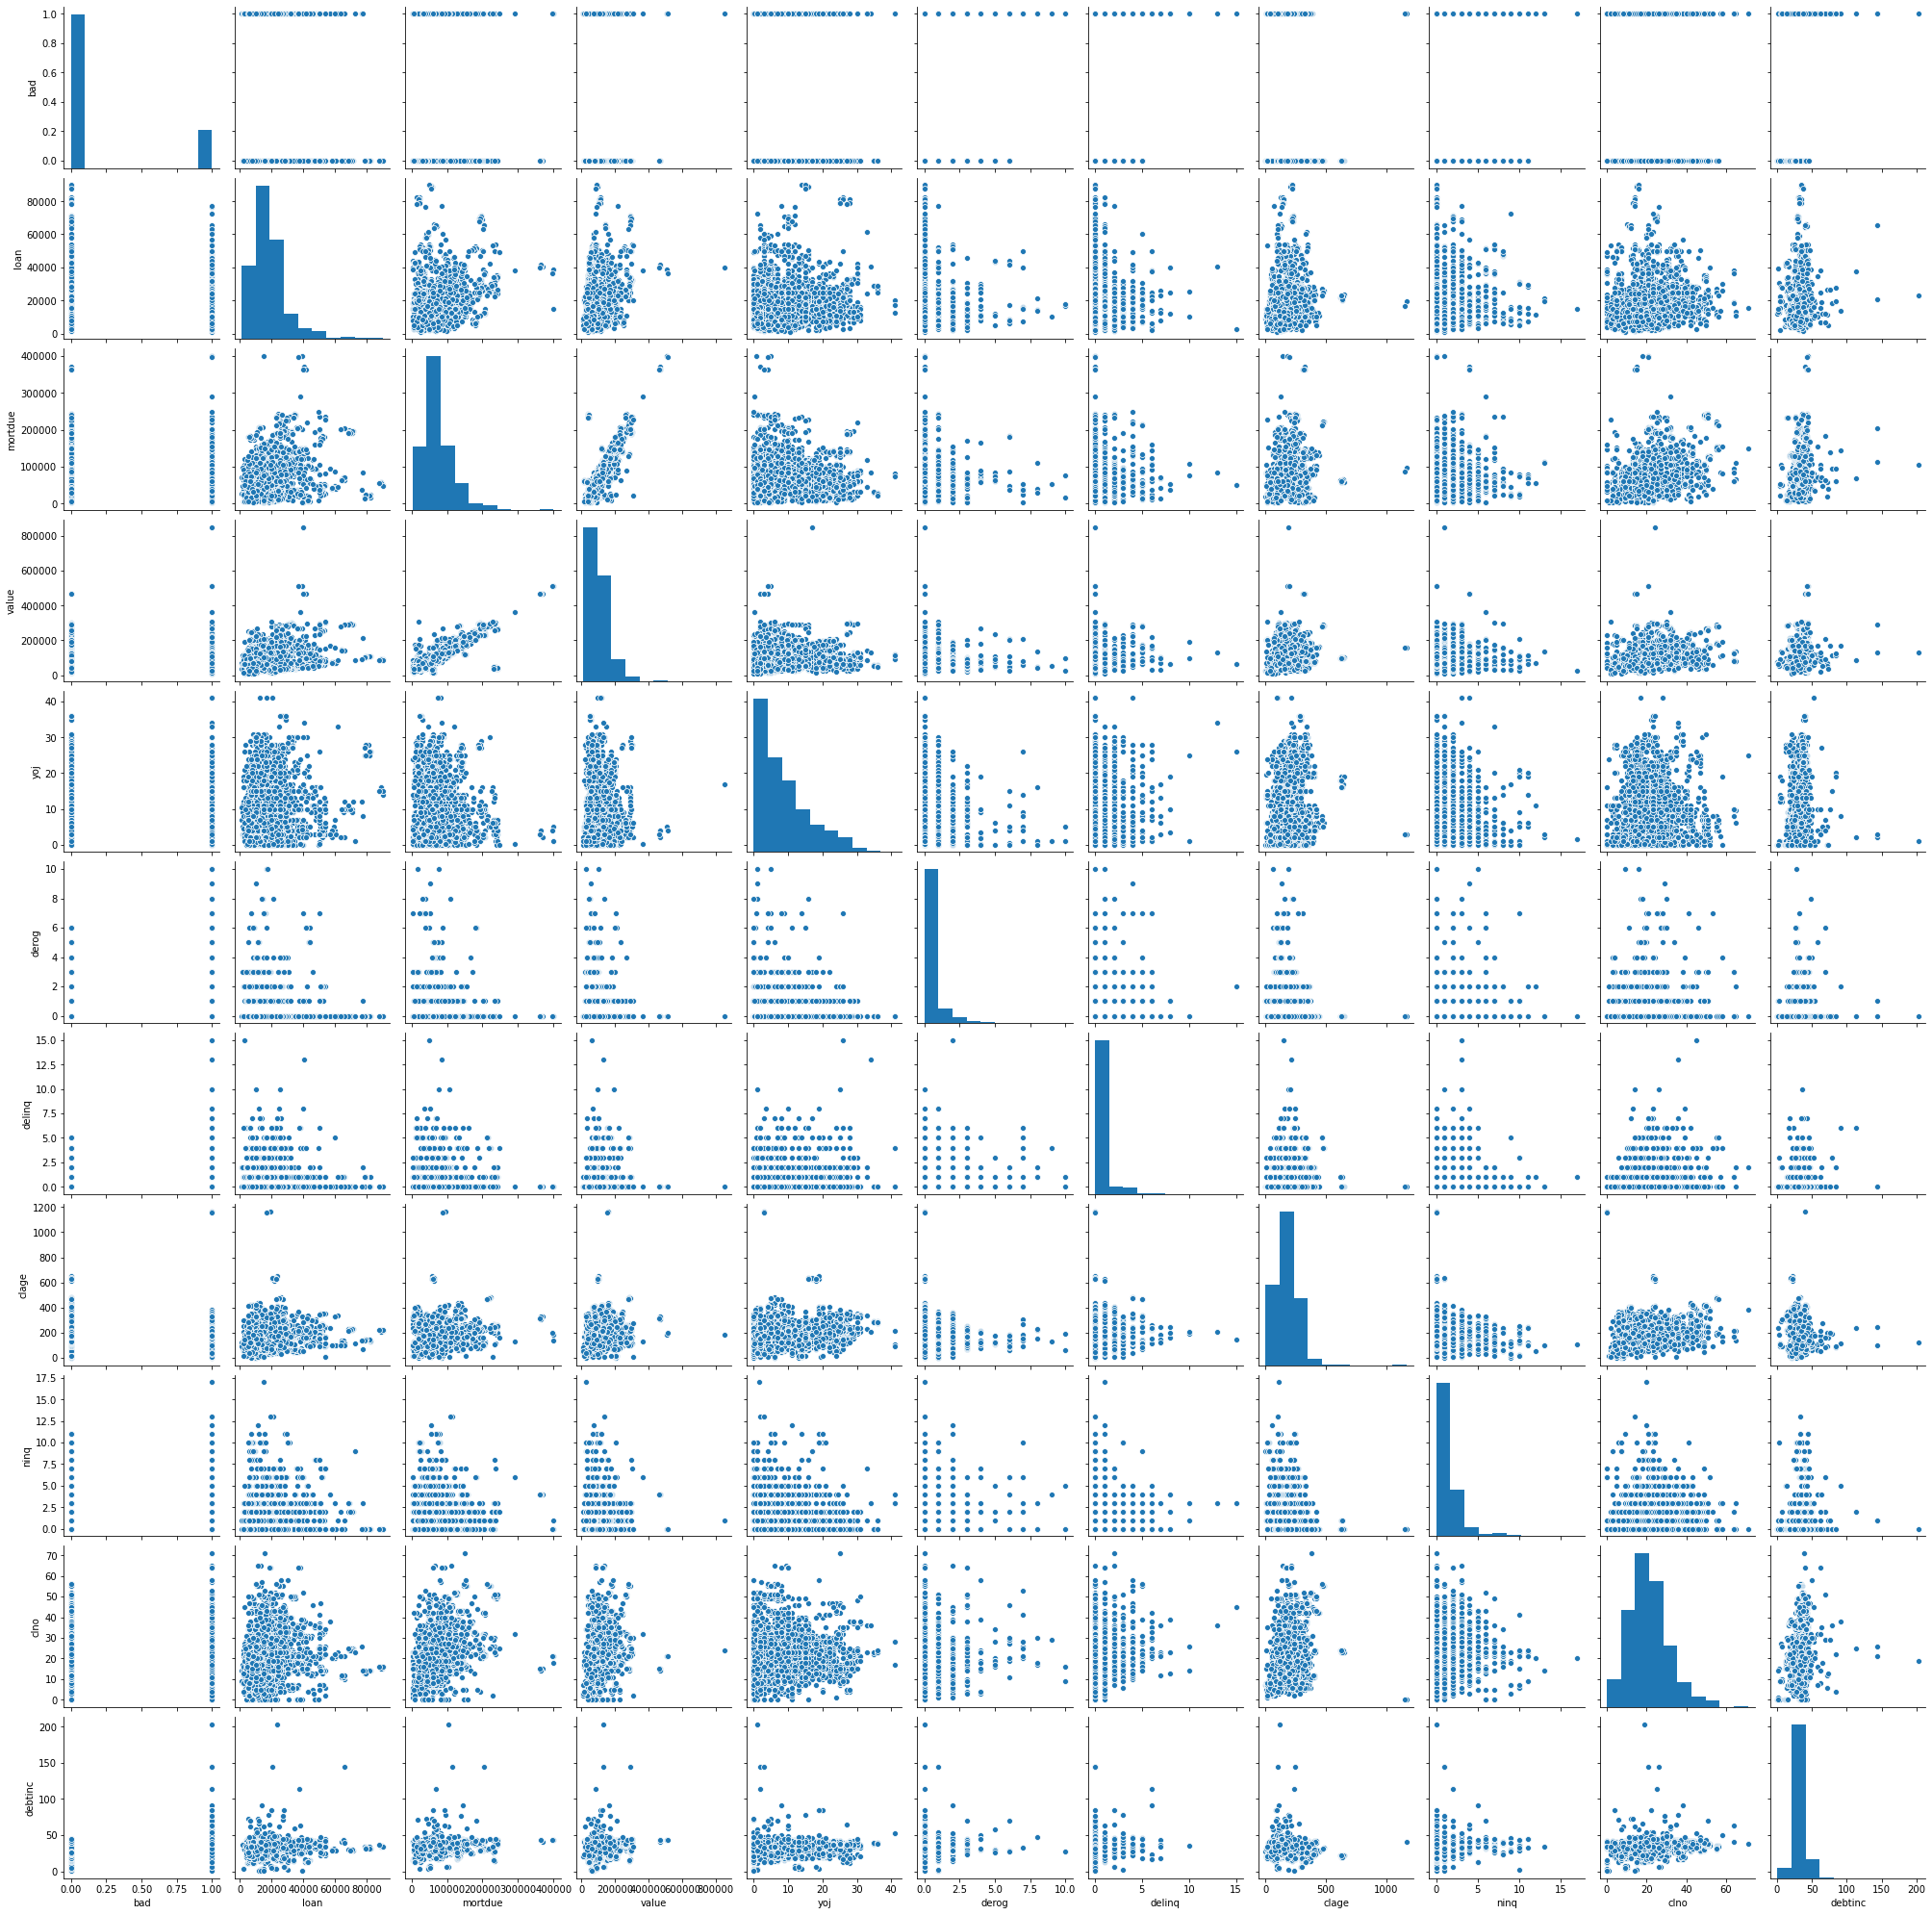

In [9]:
plt.figure(figsize=(20, 15))
seaborn.pairplot(data_pd)
plt.show()

In [ ]:
seaborn.distplot(data_pd["loan"])
plt.show()

In [ ]:
seaborn.distplot(data_pd["mortdue"])
plt.show()

In [ ]:
seaborn.distplot(data_pd["value"])
plt.show()

In [ ]:
seaborn.distplot(data_pd["yoj"])
plt.show()

In [ ]:
seaborn.distplot(data_pd["clage"])
plt.show()


In [ ]:
seaborn.distplot(data_pd["ninq"])
plt.show()


In [ ]:
seaborn.distplot(data_pd["clno"])
plt.show()


In [ ]:
seaborn.distplot(data_pd["debtinc"])
plt.show()

In [ ]:
stats.probplot(data_pd.loan,dist="norm",plot=pylab)
pylab.show()

In [ ]:
stats.probplot(data_pd.mortdue,dist="norm",plot=pylab)
pylab.show()

In [ ]:
stat, p = shapiro(data_pd.loan)
print('Statistics-%.3f, p=%.3f' % (stat,p))

In [ ]:
alpha = 0.05
if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

In [ ]:
stats.ttest_1samp(data_pd.loan, popmean=18500)

In [ ]:
sns.DescrStatsW(data_pd.loan).tconfint_mean()

In [ ]:
stat, p = shapiro(data_pd.mortdue)
print('Statistics-%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')
    


In [ ]:
stats.ttest_1samp(data_pd.mortdue, popmean=74000)


In [ ]:
sns.DescrStatsW(data_pd.mortdue).tconfint_mean()

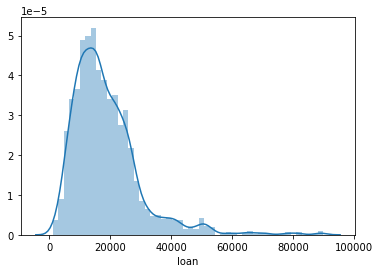

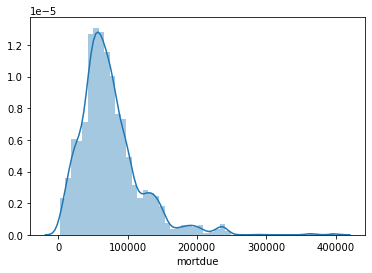

In [11]:
seaborn.distplot(data_pd["mortdue"])
plt.show()

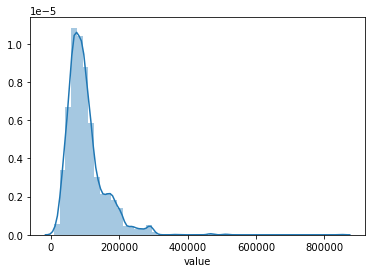

In [12]:
seaborn.distplot(data_pd["value"])
plt.show()

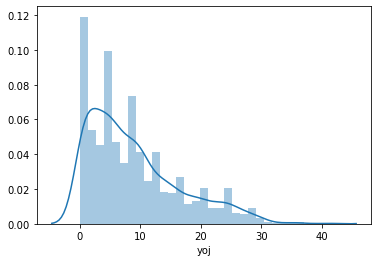

In [13]:
seaborn.distplot(data_pd["yoj"])
plt.show()

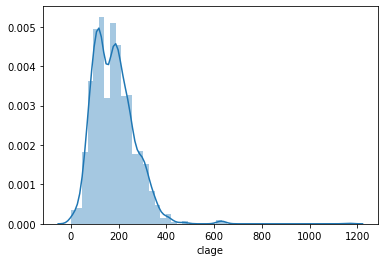

In [19]:
seaborn.distplot(data_pd["clage"])
plt.show()


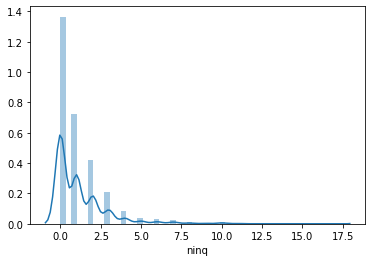

In [20]:
seaborn.distplot(data_pd["ninq"])
plt.show()


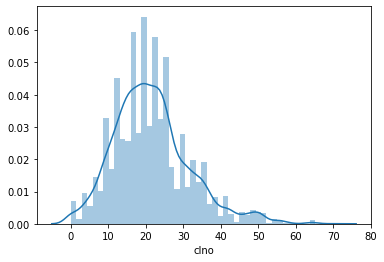

In [21]:
seaborn.distplot(data_pd["clno"])
plt.show()


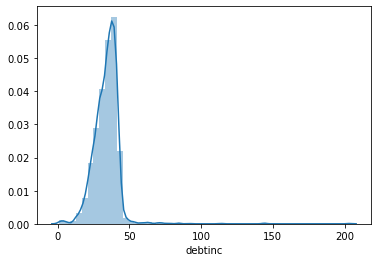

In [22]:
seaborn.distplot(data_pd["debtinc"])
plt.show()

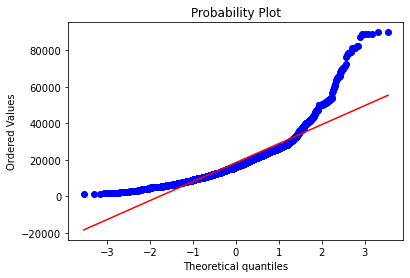

In [23]:
stats.probplot(data_pd.loan,dist="norm",plot=pylab)
pylab.show()

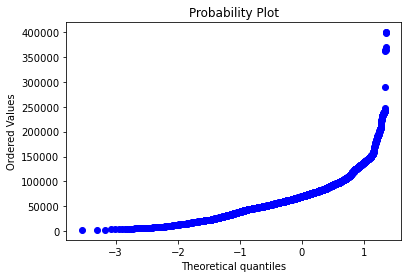

In [27]:
stats.probplot(data_pd.mortdue,dist="norm",plot=pylab)
pylab.show()

In [28]:
stat, p = shapiro(data_pd.loan)
print('Statistics-%.3f, p=%.3f' % (stat,p))

Statistics-0.849, p=0.000


In [29]:
alpha = 0.05
if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


In [31]:
stats.ttest_1samp(data_pd.loan, popmean=18500)

Ttest_1sampResult(statistic=0.15768053185764794, pvalue=0.8747174468842903)

In [32]:
sns.DescrStatsW(data_pd.loan).tconfint_mean()

(18160.427939461777, 18898.96803369259)

In [34]:
stat, p = shapiro(data_pd.mortdue)
print('Statistics-%.3f, p=%.3f' % (stat,p))

alpha = 0.05
if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')
    


Statistics-nan, p=1.000
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


In [39]:
stats.ttest_1samp(data_pd.mortdue, popmean=74000)


Ttest_1sampResult(statistic=nan, pvalue=nan)

In [38]:
sns.DescrStatsW(data_pd.mortdue).tconfint_mean()

(nan, nan)